In [1]:
import pandas as pd 
# 1. Đọc dữ liệu lên dataframe

thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [ ]:
# 2. Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên
# Trong file word đi kèm 

In [2]:
# 3. Đổi tên các cột dữ liệu cần thiết
thietbi.rename(columns={'Retail Branding':'Branding','Marketing Name':'MarketingName'},inplace=True)

In [3]:
# 4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng kết quả có các cột sau: 
#     [outgoing_mins_per_month, outgoing_sms_per_month, monthly_mb, use_id, platform, device]
dfKetQua = pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id','platform','device']],on='use_id')

In [4]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [5]:
# Hoặc dùng left-join tùy theo nhu cầu
dfKetQua = pd.merge(nguoidung_sudung,nguoidung_thietbi[['use_id','platform','device']],on='use_id',how='left')

In [6]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [8]:
# 5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong bảng kết quả cuối cùng. 
# Lưu ý ở đây khóa liên kết sẽ khác tên
#inner-join
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding','Model']],
                    left_on  = 'device',
                    right_on = 'Model'
                   )
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505


In [9]:
#left-join
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding','Model']],
                    left_on  = 'device',
                    right_on = 'Model', how = 'left'
                   )
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505


In [11]:
# 6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding_x,Model_x,Branding_y,Model_y,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505,Samsung,GT-I9505


In [12]:
# 7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng sử dụng của các nhãn hàng
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month':'mean',
    'outgoing_sms_per_month' :'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,244.302026,105.192099,2178.809982,548
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,8
Motorola,91.092326,57.906628,3338.662326,172
OnePlus,416.341667,43.740000,3576.103333,18
Samsung,169.136728,87.165864,5085.595556,162
Sony,254.425000,42.611765,4351.370294,34


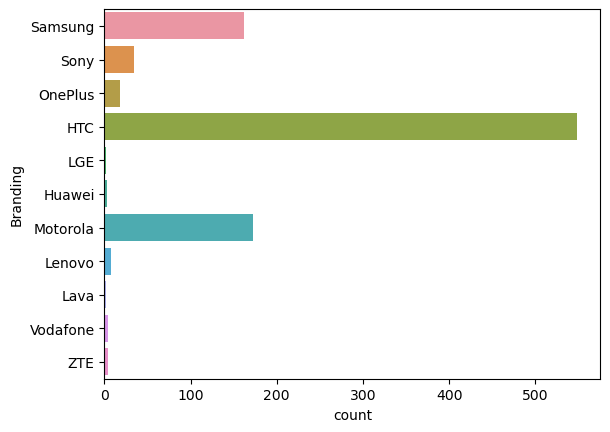

In [15]:
# 8. Trực quan số lượng người dùng các nhãn hàng
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Branding',data=dfKetQua)
plt.show()

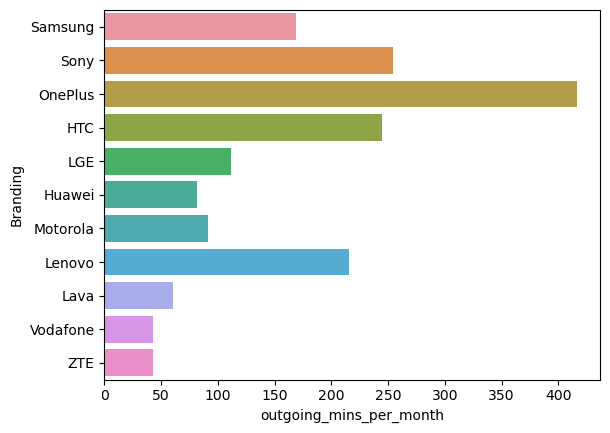

In [16]:
# 9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên từng nhóm nhãn hàng bán lẻ
import numpy as np
sns.barplot(y='Branding',x='outgoing_mins_per_month', data=dfKetQua,estimator=np.mean, errorbar=None,orient='horizontal')
plt.show()

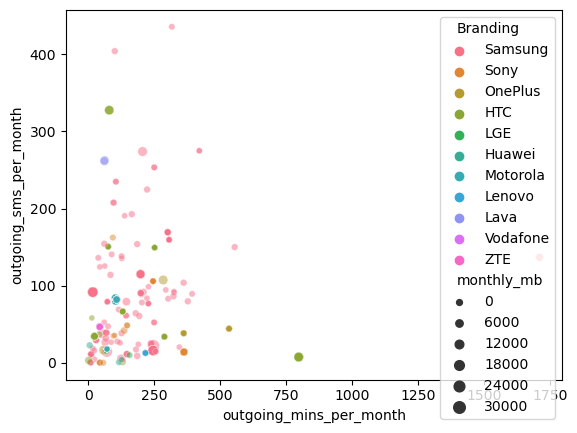

In [18]:
# 10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng

sns.scatterplot(x='outgoing_mins_per_month',
                y='outgoing_sms_per_month',
                size='monthly_mb',
                alpha=0.5,
                hue='Branding',
                data=dfKetQua)
plt.show()

In [ ]:
#DONE